In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg
import graphviz 
import pickle

############################
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,VotingClassifier,RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_predict, KFold, train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree._export import plot_tree


In [7]:
df_Nacional = pd.read_csv('../microdadosEnem_Nacional_Amostragem.csv', sep = ';', encoding='ISO 8859-1')
df_Nacional = df_Nacional.loc[:, ~df_Nacional.columns.str.contains('^Unnamed')]
df_Alagoas = pd.read_csv('../microdadosEnemAlagoas.csv', sep = ';', encoding='ISO 8859-1')
df_Alagoas = df_Alagoas.loc[:, ~df_Alagoas.columns.str.contains('^Unnamed')]
#df_Alagoas.head(5)

In [8]:
# feature-cols vai armazenar todas as colunas exceto a coluna que armazena as
# notas de matemática do participante de Alagoas
feature_cols = [x for x in df_Alagoas.columns if x != 'NU_NOTA_REDACAO']
X = df_Alagoas[feature_cols]
Y = df_Alagoas['NU_NOTA_REDACAO']

In [9]:
# feature-cols vai armazenar todas as colunas exceto a coluna que armazena as
# notas de matemática do participante de Alagoas
feature_cols = [x for x in df_Nacional.columns if x != 'NU_NOTA_REDACAO']
X2 = df_Nacional[feature_cols]
Y2 = df_Nacional['NU_NOTA_REDACAO']

In [10]:
# Leitura dos datasets de treino e teste e criação do df de resposta
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=0)
#test-size = 0.3 define que o tamanho da base de teste é de 30% da base principal, e a base de treino é 70%

#visualizando os tamanhos da bases, teino e teste
print(X.shape, Y.shape, X_train.shape, y_train.shape ,X_test.shape, y_test.shape)

(64605, 40) (64605,) (45223, 40) (45223,) (19382, 40) (19382,)


In [11]:
# Leitura dos datasets de treino e teste e criação do df de resposta
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, Y2, test_size=0.3, random_state=0)
#test-size = 0.3 define que o tamanho da base de teste é de 30% da base principal, e a base de treino é 70%

In [9]:
l1 = []
l2 = []

In [11]:

#pickle.dump(clf, open('modelo.sav', 'wb'))

In [27]:
modelos = ['Random  Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de Decisão']

In [62]:
#https://docs.python.org/3/library/pickle.html
#salvar em disco o modelo treinado
for i, j, k in zip(l1, l2, modelos):
    pickle.dump(i, open(k +'_AL.sav', 'wb'))
    pickle.dump(j, open(k +'_BR.sav', 'wb'))

In [63]:
def aplicaPI(reg, X_test, y_test ):
    result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    return result

ValueError: shape mismatch: objects cannot be broadcast to a single shape

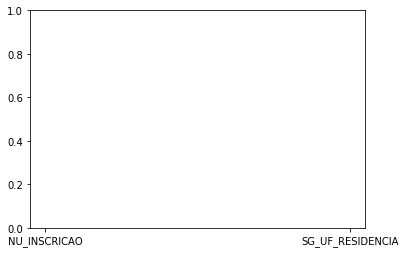

In [18]:
#Para carregar o modelo treinado vamos usar o método load(), veja.
rfPI = pickle.load(open('rfPI_AL.sav', 'rb'))
rfPI.importances_mean.argsort()
sorted_idx = rfPI.importances_mean.argsort()
fig, ax = plt.subplots()
ax.bar(X_test.columns[sorted_idx], rfPI.importances_mean)
#X_test.columns[1]

In [64]:
nomes=['rf', 'rl','rn', 'dtree']
for i, j, k in zip(l1, l2, nomes):
    pickle.dump(aplicaPI(i, X_test, y_test ), open(k +'PI_AL.sav', 'wb'))
    pickle.dump(aplicaPI(j, X_test, y_test ), open(k +'PI_BR.sav', 'wb'))

In [19]:
rfPI    = pickle.load(open('rfPI_AL.sav', 'rb'))
rlPI    = pickle.load(open('rlPI_AL.sav', 'rb'))
rnPI    = pickle.load(open('rnPI_AL.sav', 'rb'))
dtreePI = pickle.load(open('dtreePI_AL.sav', 'rb'))

In [26]:
rfPI.importances

array([[ 5.38193149e-02,  6.22700056e-02,  6.31668306e-02,
         5.80402415e-02,  5.60069905e-02,  5.37827843e-02,
         5.60993808e-02,  5.50662427e-02,  5.71793136e-02,
         5.93985814e-02],
       [ 1.20666924e-02,  1.12969556e-02,  1.45141962e-02,
         1.32361559e-02,  1.12420737e-02,  1.23189008e-02,
         1.50007106e-02,  1.56483960e-02,  1.17143571e-02,
         1.33793937e-02],
       [ 5.42577061e-04,  1.63660552e-03,  4.47197886e-04,
         6.71774668e-04,  2.01170170e-04,  5.57447577e-04,
         8.07239048e-05,  8.96080852e-04,  3.54100334e-04,
         7.79853435e-04],
       [-1.16593953e-03,  1.93857910e-04, -1.31591773e-03,
        -1.05322371e-03, -1.50849030e-03, -1.66044263e-03,
        -8.65460380e-04, -1.15012807e-03, -1.49779558e-03,
         4.37782353e-04],
       [ 1.22565959e-02,  1.14698115e-02,  1.18350371e-02,
         9.40041740e-03,  8.22857395e-03,  1.15952085e-02,
         1.20526583e-02,  1.34347984e-02,  9.73973947e-03,
         1.

In [23]:
rfPI.importances_mean 
sorted_idx = rfPI.importances_mean.argsort()
print(rfPI.importances_mean[sorted_idx] , rfPI.importances_mean.argsort(), X_test.columns[sorted_idx])

[-1.97582243e-03 -1.73415070e-03 -9.58575767e-04 -7.75395355e-04
 -4.97892941e-04 -4.40766296e-04 -8.74187122e-05 -8.16113388e-05
 -5.74230720e-05 -1.54848941e-05 -1.45168960e-05 -1.10587937e-05
  7.74275454e-07  4.89300267e-05  4.94835199e-05  2.22354199e-04
  3.52513654e-04  3.81233185e-04  5.83957440e-04  5.93009514e-04
  6.16753141e-04  6.43152306e-04  7.12848781e-04  8.19883292e-04
  1.01919680e-03  1.08321812e-03  1.19232331e-03  1.46459214e-03
  1.63954826e-03  2.77547431e-03  4.58423651e-03  1.13196039e-02
  1.30417832e-02  2.86235669e-02  5.38052045e-02  5.74829686e-02
  7.57678106e-02  1.53128414e-01] [12 32  3 29 16 23 17 28 22 27 19 31 30 25 33 21 35 26 15  6  2 18 20  5
 14 37 24 13 11 34 36  4  1 10  7  0  8  9] Index(['NU_NOTA_MT', 'Q020', 'TP_SEXO', 'Q017', 'Q004', 'Q011', 'Q005', 'Q016',
       'Q010', 'Q015', 'Q007', 'Q019', 'Q018', 'Q013', 'Q021', 'Q009', 'Q023',
       'Q014', 'Q003', 'TP_ANO_CONCLUIU', 'NU_IDADE', 'Q006', 'Q008',
       'TP_COR_RACA', 'Q002', 'Q025

NameError: name 'y_pos' is not defined

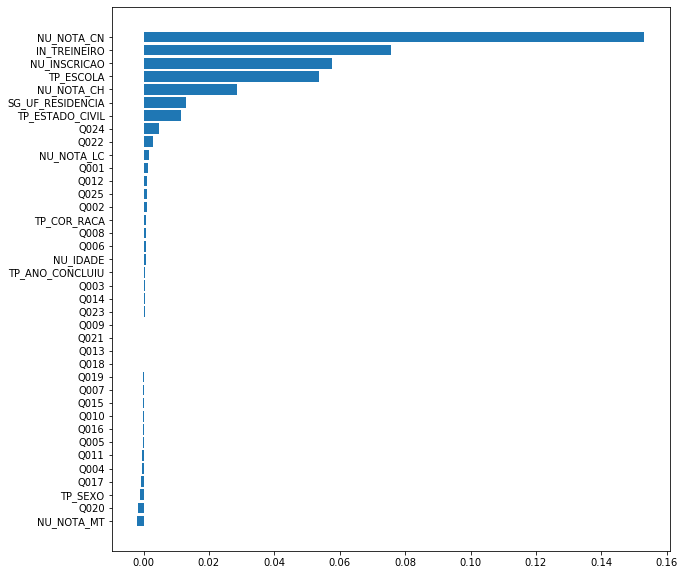

In [25]:
PI=pd.DataFrame()
#r1.importances_mean[i1]

fig, ax = plt.subplots(figsize=(10, 10))
#y_pos = i1
#per = r1.importances_mean[i1]
ax.barh(X_test.columns[sorted_idx], rfPI.importances_mean[sorted_idx], align='center')
ax.set_yticks(y_pos)
#ax.set_yticklabels(X_test.columns[i1])
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Permutation importance')
ax.invert_yaxis() 
plt.show()


In [123]:

df_imprimirImportância = pd.DataFrame()


#modelo.predict(X[0:1])
modelo.importances_mean
modelo
sorted_idx = rfPI.importances_mean.argsort()
sorted_idx
df_imprimirImportância['feature'] = X_test.columns[sorted_idx]
df_imprimirImportância['importancia'] = modelo.importances_mean 
X_test.columns[sorted_idx]
for i in sorted_idx:
    print(X_test.columns[i], rfPI.importances_mean[i] )


Q001 -0.001975822425048901
Q022 -0.0017341506996240929
TP_COR_RACA -0.0009585757667017414
Q019 -0.0007753953551363879
Q006 -0.0004978929414687583
Q013 -0.000440766295784234
Q007 -8.741871221310538e-05
Q018 -8.161133881229299e-05
Q012 -5.7423072029905155e-05
Q017 -1.5484894086448266e-05
Q009 -1.4516896020944081e-05
Q021 -1.1058793655960298e-05
Q020 7.742754539519226e-07
Q015 4.893002674080105e-05
Q023 4.948351991677091e-05
Q011 0.0002223541985909905
Q025 0.00035251365385265967
Q016 0.00038123318476902536
Q004 0.0005839574403779357
IN_TREINEIRO 0.0005930095137747671
TP_ESTADO_CIVIL 0.0006167531410391502
Q008 0.0006431523055633548
Q010 0.0007128487812742446
TP_ESCOLA 0.0008198832916437859
Q003 0.0010191967993038787
Q027 0.001083218124983787
Q014 0.0011923233148238843
Q002 0.0014645921430164854
Q005 0.0016395482609792955
Q024 0.0027754743111261027
Q026 0.004584236505863681
TP_ANO_CONCLUIU 0.01131960394539443
TP_SEXO 0.013041783202614643
NU_NOTA_MT 0.02862356688451666
NU_NOTA_CN 0.053805204

In [105]:

df_imprimirImportância.sort_values(by=['importancia'],ascending=False)

feature   importancia
9              Q017  1.531284e-01
8              Q012  7.576781e-02
0              Q001  5.748297e-02
7              Q018  5.380520e-02
10             Q009  2.862357e-02
1              Q022  1.304178e-02
4              Q006  1.131960e-02
36       NU_NOTA_CH  4.584237e-03
34       NU_NOTA_CN  2.775474e-03
11             Q021  1.639548e-03
13             Q015  1.464592e-03
24             Q003  1.192323e-03
37       NU_NOTA_LC  1.083218e-03
14             Q023  1.019197e-03
5              Q013  8.198833e-04
20  TP_ESTADO_CIVIL  7.128488e-04
18             Q004  6.431523e-04
2       TP_COR_RACA  6.167531e-04
6              Q007  5.930095e-04
15             Q011  5.839574e-04
26             Q014  3.812332e-04
35         NU_IDADE  3.525137e-04
21             Q008  2.223542e-04
33       NU_NOTA_MT  4.948352e-05
25             Q027  4.893003e-05
30             Q026  7.742755e-07
31  TP_ANO_CONCLUIU -1.105879e-05
19     IN_TREINEIRO -1.451690e-05
27             Q002 -1.548489e-05
22             Q010 -5.742307e-05
28             Q005 -8.161134e-05
17             Q016 -8.741871e-05
23        TP_ESCOLA -4.407663e-04
16             Q025 -4.978929e-04
29             Q024 -7.753954e-04
3              Q019 -9.585758e-04
32          TP_SEXO -1.734151e-03
12             Q020 -1.975822e-03

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
X = [[1, 9, 9],[1, 9, 9],[1, 9, 9],
     [0, 9, 9],[0, 9, 9],[0, 9, 9]]
y = [1, 1, 1, 0, 0, 0]
clf = LogisticRegression().fit(X, y)
result = permutation_importance(clf, X, y, n_repeats=10,
                                random_state=0)
result.importances_mean

 #result.importances_std


array([0.46666667, 0.        , 0.        ])

[0.46666667 0.         0.        ] [0.22110832 0.         0.        ]


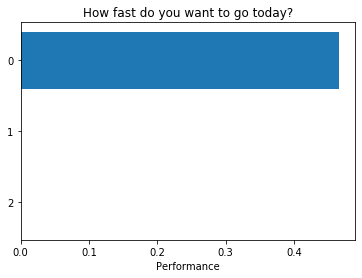

In [22]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()


In [42]:

    r1,i1 = aplicaPI(rf, X_test, y_test )
    r2, i2 = aplicaPI(rf2, X2_test, y2_test )
    

In [73]:
X_test.columns[i1]

for i in i1:
    print(r1.importances_mean[i], X_test.columns[i])

-0.001975822425048901 Q001
-0.0017341506996240929 Q022
-0.0009585757667017414 TP_COR_RACA
-0.0007753953551363879 Q019
-0.0004978929414687583 Q006
-0.000440766295784234 Q013
-8.741871221310538e-05 Q007
-8.161133881229299e-05 Q018
-5.7423072029905155e-05 Q012
-1.5484894086448266e-05 Q017
-1.4516896020944081e-05 Q009
-1.1058793655960298e-05 Q021
7.742754539519226e-07 Q020
4.893002674080105e-05 Q015
4.948351991677091e-05 Q023
0.0002223541985909905 Q011
0.00035251365385265967 Q025
0.00038123318476902536 Q016
0.0005839574403779357 Q004
0.0005930095137747671 IN_TREINEIRO
0.0006167531410391502 TP_ESTADO_CIVIL
0.0006431523055633548 Q008
0.0007128487812742446 Q010
0.0008198832916437859 TP_ESCOLA
0.0010191967993038787 Q003
0.001083218124983787 Q027
0.0011923233148238843 Q014
0.0014645921430164854 Q002
0.0016395482609792955 Q005
0.0027754743111261027 Q024
0.004584236505863681 Q026
0.01131960394539443 TP_ANO_CONCLUIU
0.013041783202614643 TP_SEXO
0.02862356688451666 NU_NOTA_MT
0.05380520447464299 NU

In [118]:
y_pos = np.arange(len(X_test.columns[i1]))
y_pos = i1
y_pos
w= r1.importances_mean[i1]
i1
w.argsort()



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

ValueError: too many values to unpack (expected 2)

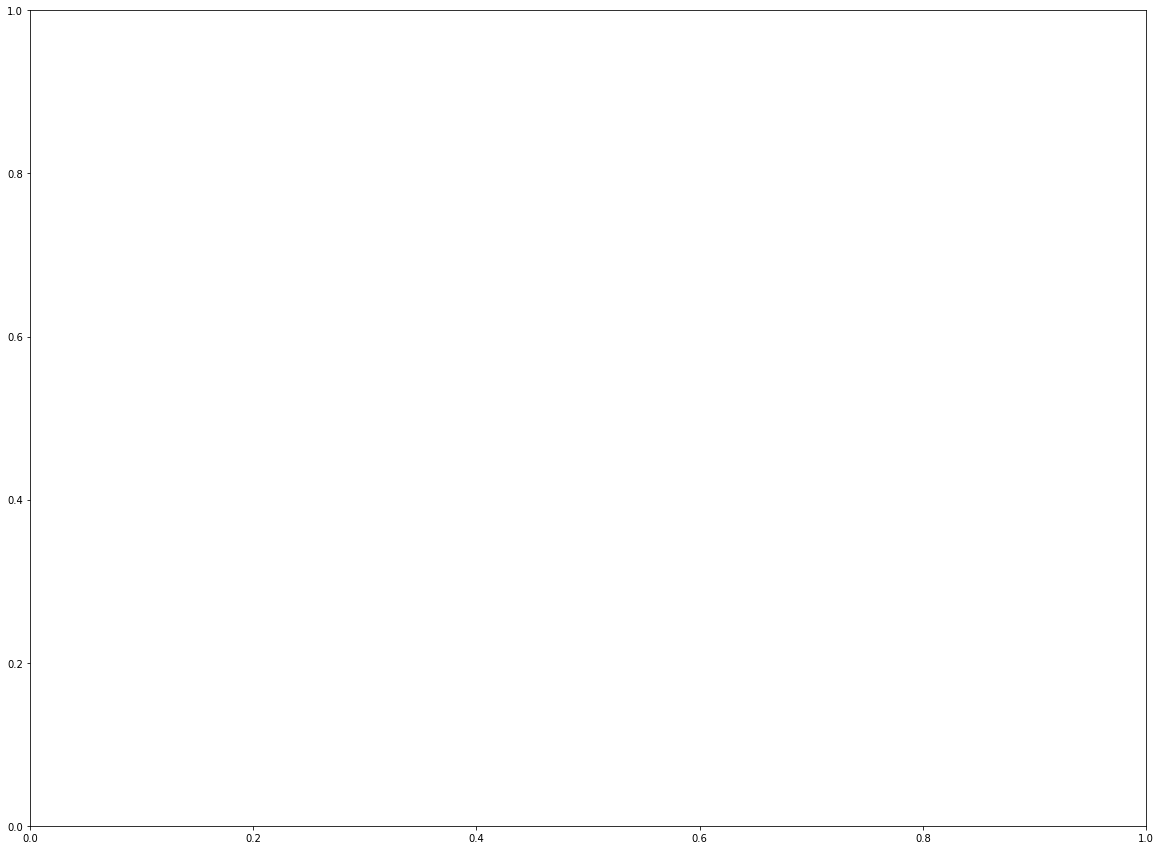

In [67]:
fig, ax = plt.subplots(figsize=(20, 15))
(result, sorted_idx) = aplicaPI(rf, X_test, y_test )
    
ax.barh(result.importances_mean[sorted_idx].T,  labels=X_test.columns[sorted_idx])
ax.title("Permutation Importance - Notas Matemática - AL - "+ label, fontsize=15)
plt.show()

In [71]:
PI=pd.DataFrame()
def aplicaPI(reg, X_test, y_test ):
    result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    sorted_idx = result.importances_mean.argsort()
    return (result, sorted_idx)

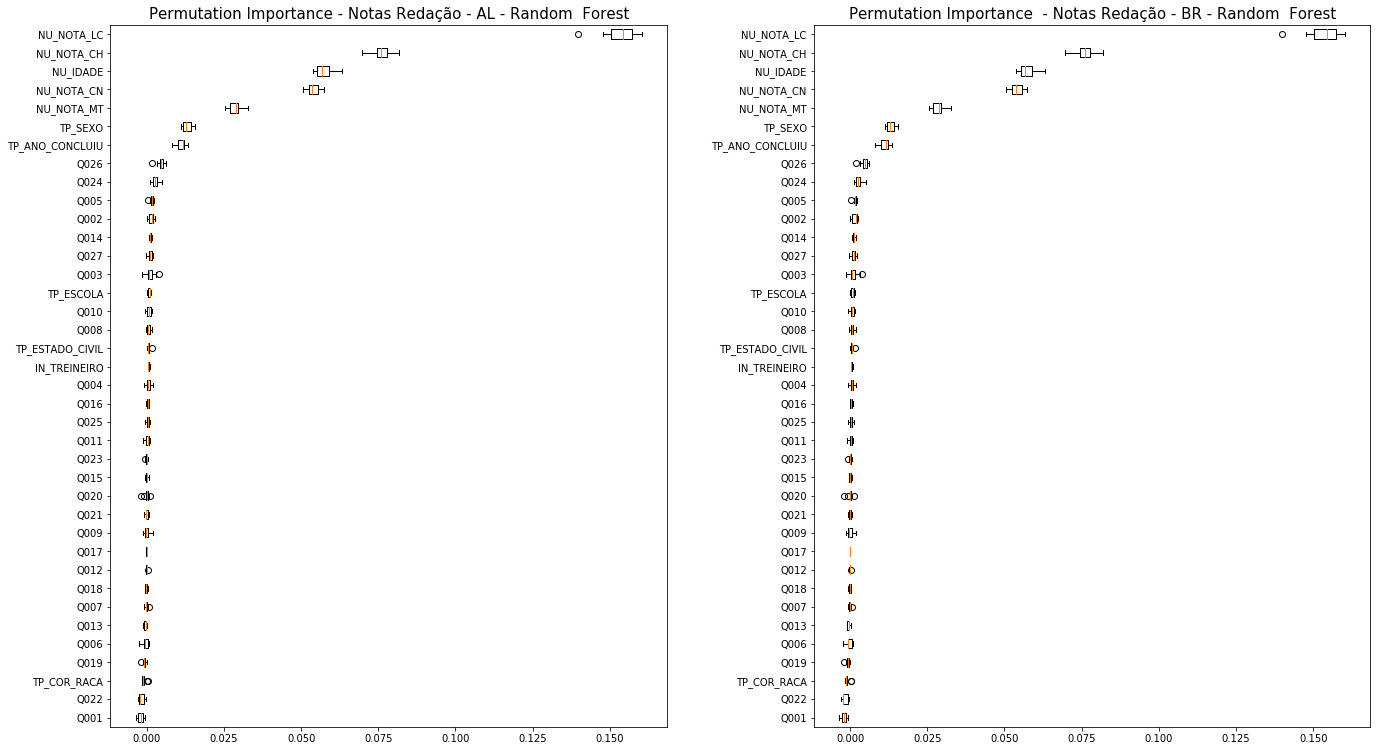

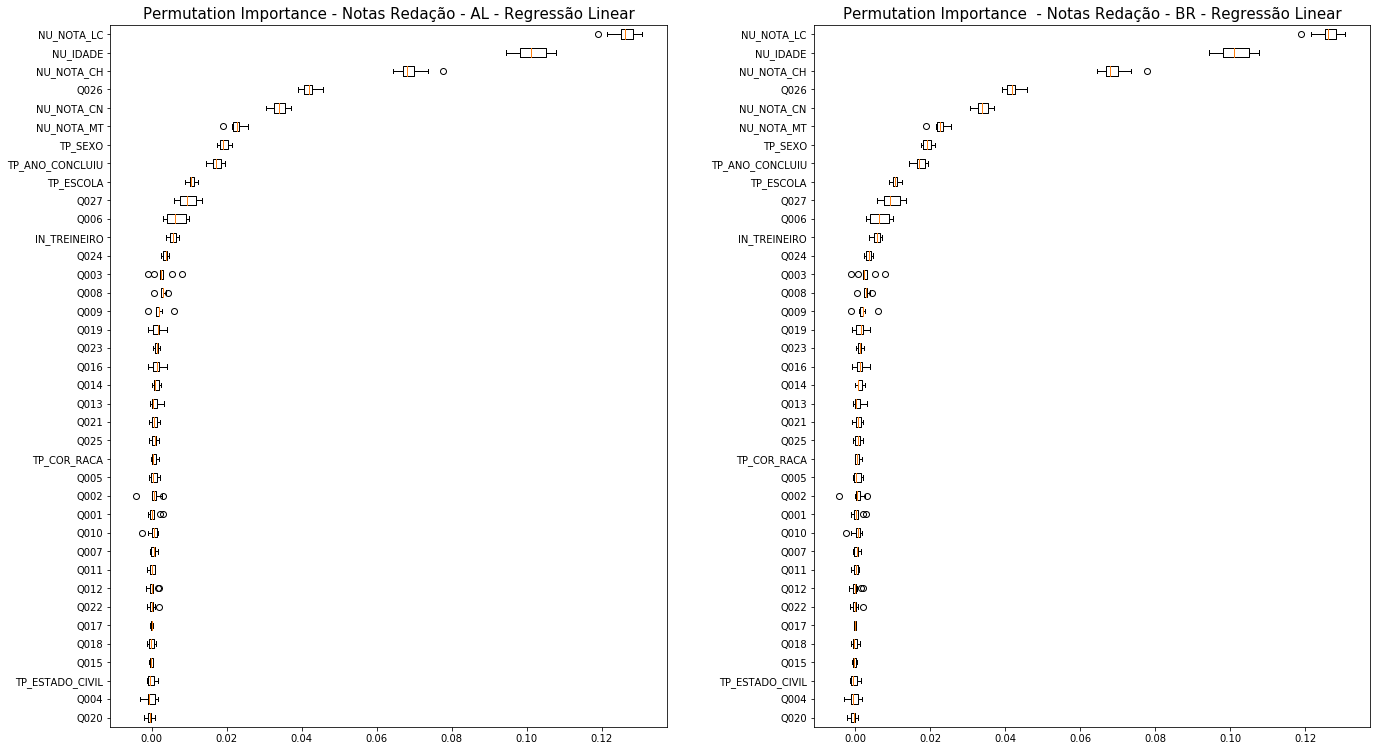

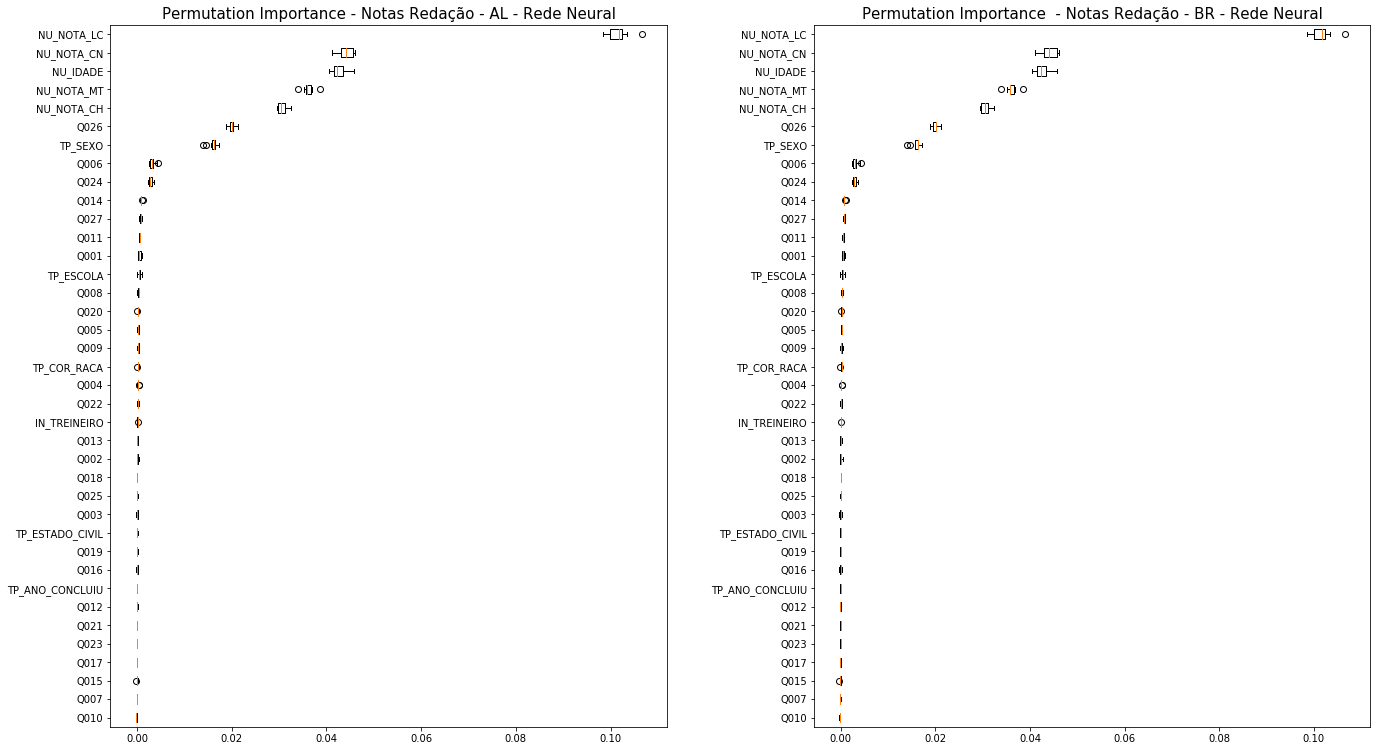

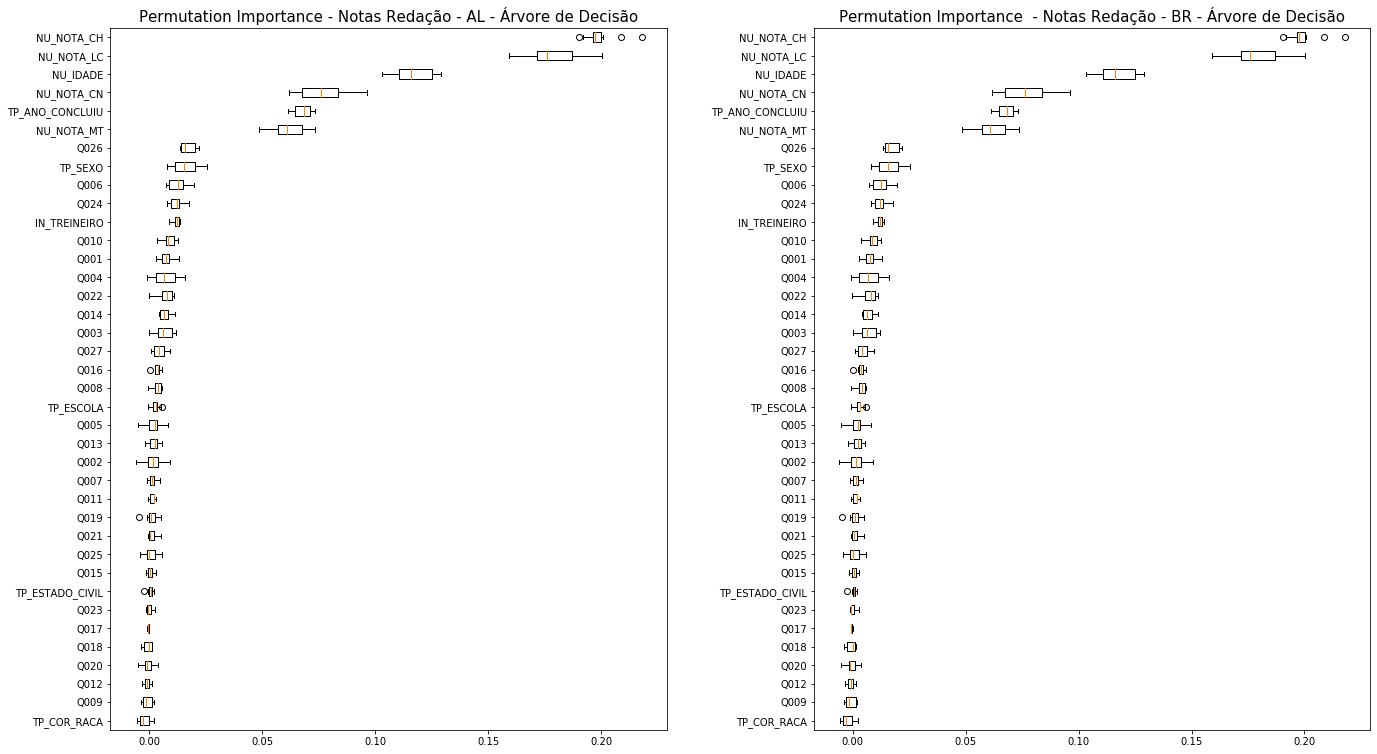

In [72]:

for label, reg1, reg2 in zip(modelos, l1, l2):

    fig = plt.figure(figsize=(20, 15))
    ########primeiro plot
    (result, sorted_idx) = aplicaPI(reg1, X_test, y_test )
    plt.subplot(1, 2, 1)
    plt.boxplot(result.importances[sorted_idx].T,
            vert=False,  labels=X_test.columns[sorted_idx])
    plt.title("Permutation Importance - Notas Redação - AL - "+ label, fontsize=15)

    ############ segundo plot
    (result, sorted_idx) = aplicaPI(reg2, X2_test, y2_test )
    plt.subplot(1, 2, 2)
    plt.boxplot(result.importances[sorted_idx].T,
            vert=False,  labels=X_test.columns[sorted_idx])
    plt.title("Permutation Importance  - Notas Redação - BR - " + label, fontsize=15 )

    fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
    plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
    #fig.tight_layout()
    plt.savefig('imagens/PI_'+label+'_RD.png', format='png')
    plt.show()

In [ ]:
A features com maior permutation inportances para os modelos 
* Random Forest
NU_NOTA_CH
NU_NOTA_LC
NU_NOTA_CN
TP_SEXO
NU_NOTA_REDACAO
NU_IDADE
Q002
Q006
Q007
Q009
* Árvore de Decisão
NU_NOTA_CH
NU_NOTA_CN
NU_NOTA_LC
NU_NOTA_REDACAO
TP_SEXO
NU_IDADE
Q004
Q022
Q003
Q013


* Rgressão Linear
NU_NOTA_CH
NU_NOTA_CN
NU_NOTA_LC
TP_SEXO
NU_IDADE
NU_NOTA_REDACAO
TP_ANO_CONCLUIU
Q006
Q002
TP_ESCOLA

* Rede Neural
NU_NOTA_CN
NU_NOTA_LC
TP_SEXO
NU_NOTA_CH
NU_NOTA_REDACAO
NU_IDADE
Q006
Q002
Q003
Q024

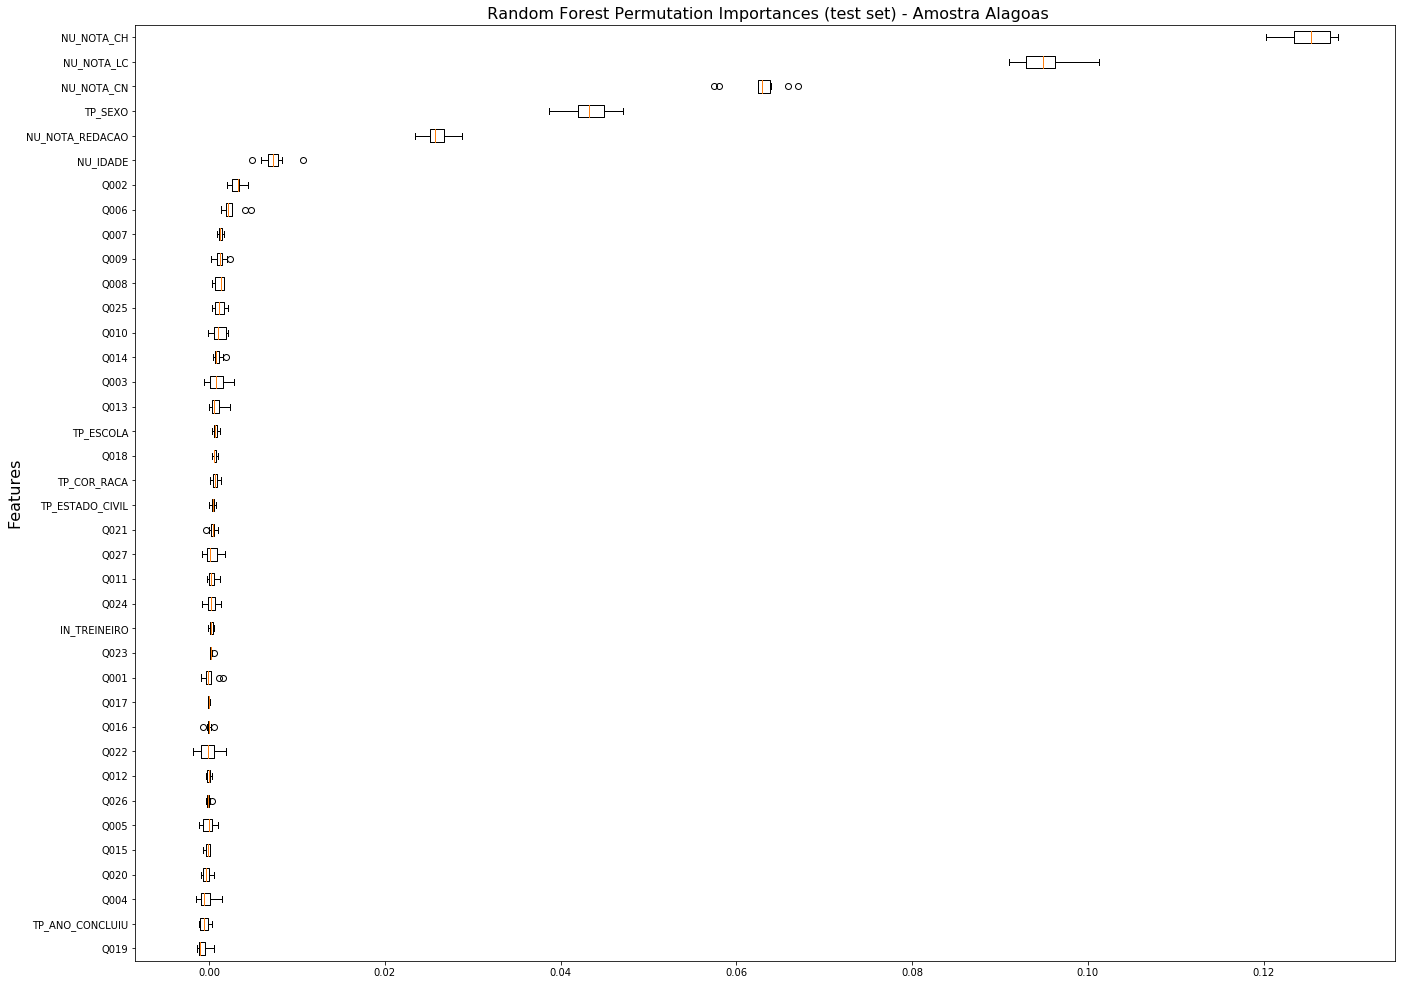

In [14]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Random Forest Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_RF_MT_AL.png', format='png')

plt.show()

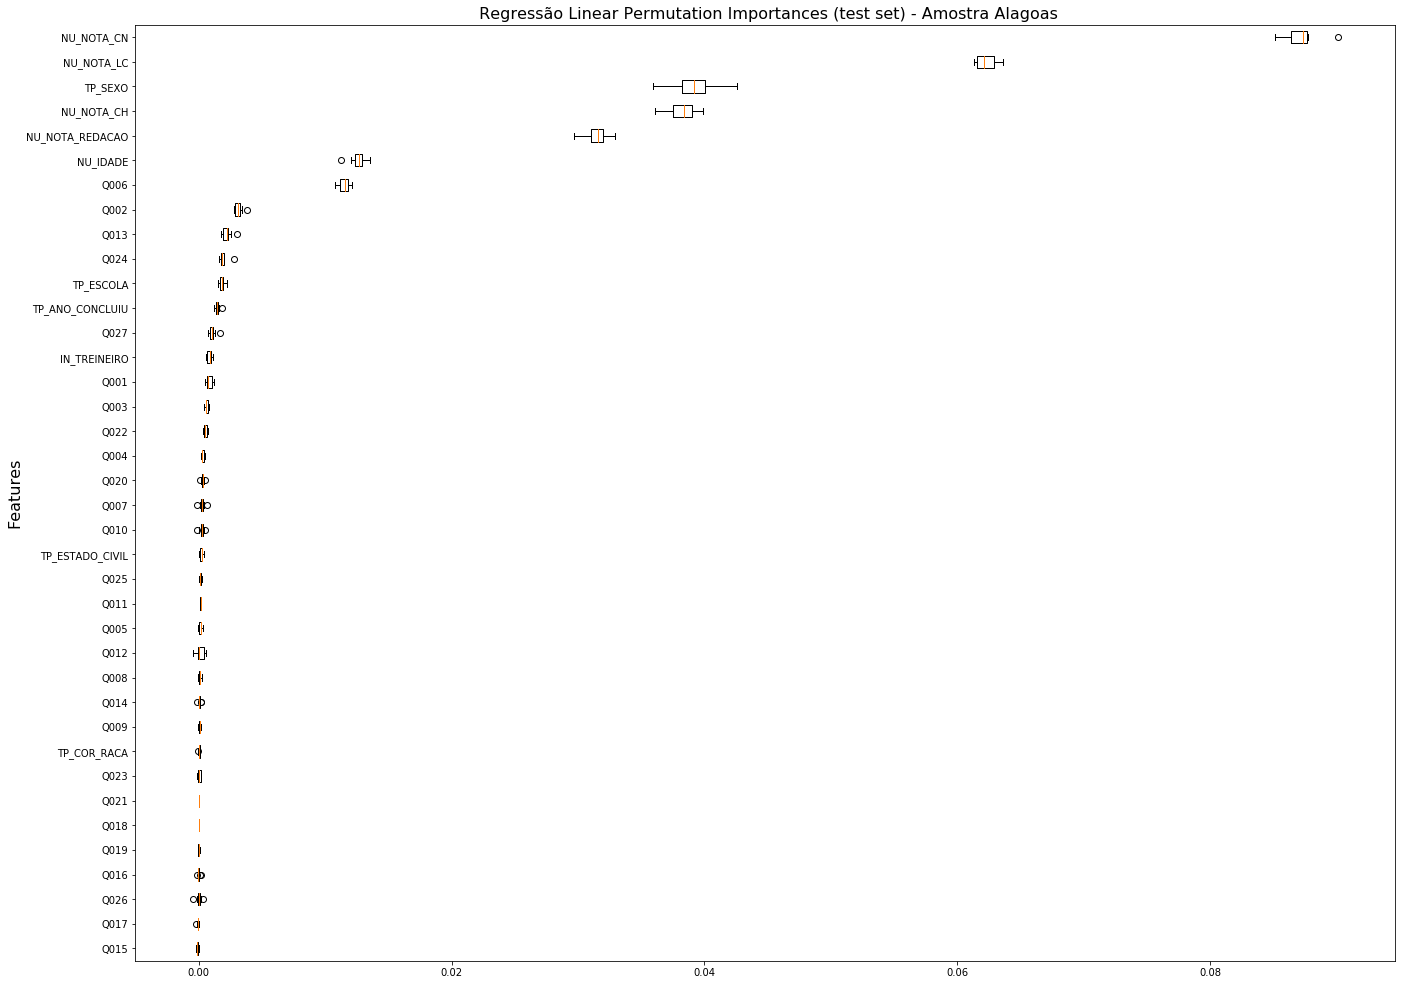

In [15]:
result = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Regressão Linear Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_LR_MT_AL.png', format='png')

plt.show()

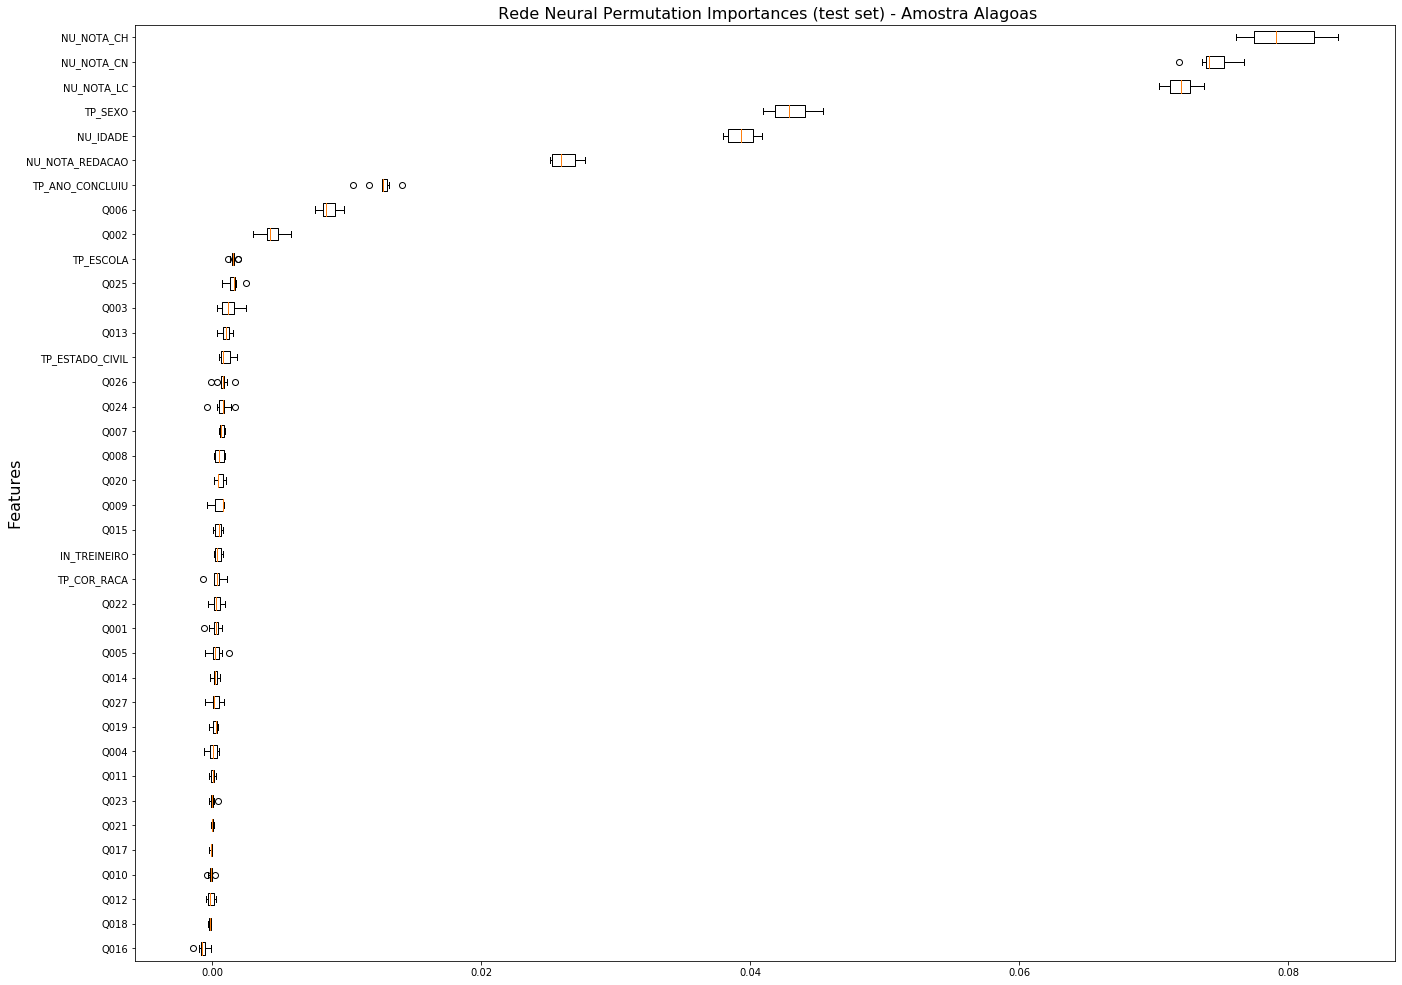

In [16]:
result = permutation_importance(rn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Rede Neural Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_RN_MT_AL.png', format='png')

plt.show()

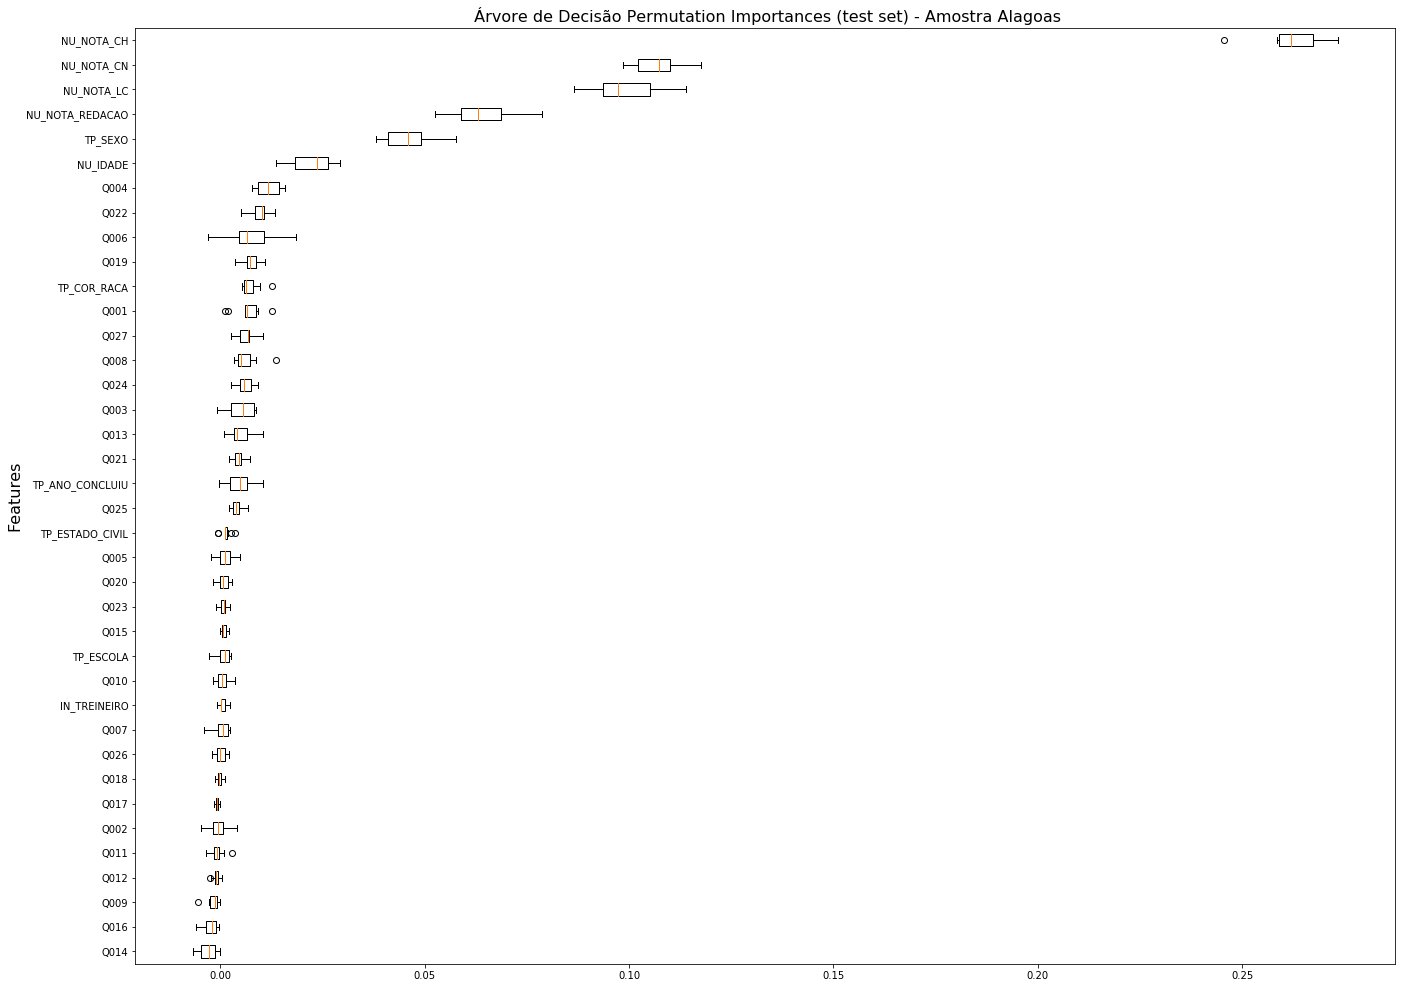

In [17]:
result = permutation_importance(dtree, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title(" Árvore de Decisão Permutation Importances (test set) - Amostra Alagoas", fontsize=16)
ax.set_ylabel("Features", fontsize = 16)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_DT_MT_AL.png', format='png')

plt.show()